# Защита персональных данных клиентов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоги</a></span></li></ul></div>

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.


**Описание данных**

Набор данных находится в файле `/datasets/insurance.csv`.
* **Признаки**: пол, возраст и зарплата застрахованного, количество членов его семьи.
* **Целевой признак**: количество страховых выплат клиенту за последние 5 лет.


**Этапы работы:**
* загрузка и обзор данных;
* ответ на вопрос и обоснование решения: "Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?";
* разработка алгоритма преобразования данных для решения задачи и обоснование, почему качество линейной регрессии не поменяется;
* проверка работы алгоритма.


## Загрузка данных

Импортируем библиотеки и модули, которые потребуются для выполнения проекта.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

Загрузим и изучим данные.

In [2]:
try:
    data = pd.read_csv('datasets/insurance.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Выведем на экран информацию о датасете методом `info()`. Как можно видеть, данные во всех столбцах имеют численный формат, пропуски отсутствуют. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data['Возраст'].unique()

array([41., 46., 29., 21., 28., 43., 39., 25., 36., 32., 38., 23., 40.,
       34., 26., 42., 27., 33., 47., 30., 19., 31., 22., 20., 24., 18.,
       37., 48., 45., 44., 52., 49., 35., 56., 65., 55., 57., 54., 50.,
       53., 51., 58., 59., 60., 61., 62.])

In [6]:
data['Зарплата'].unique()

array([49600., 38000., 21000., 41700., 26100., 41000., 39700., 38600.,
       49700., 51700., 36600., 29300., 39500., 55000., 43700., 23300.,
       48900., 33200., 36900., 43500., 36100., 26600., 48700., 40400.,
       38400., 34600., 34800., 36800., 42200., 46300., 30300., 51000.,
       28100., 64800., 30400., 45300., 38300., 49500., 19400., 40200.,
       31700., 69200., 33100., 31600., 34500., 38700., 39600., 42400.,
       34900., 30500., 24200., 49900., 14300., 47000., 44800., 43800.,
       42700., 35400., 57200., 29600., 37400., 48100., 33700., 61800.,
       39400., 15600., 52600., 37600., 52500., 32700., 51600., 60900.,
       41800., 47400., 26500., 45900., 35700., 34300., 26700., 25700.,
       33300., 31100., 31500., 42100., 37300., 42500., 27300., 46800.,
       33500., 44300., 41600., 53900., 40100., 44600., 45000., 32000.,
       38200., 33000., 38500., 51800., 33800., 46400., 43200., 31800.,
       50200., 35100., 30700., 45800., 49300., 42800., 33600., 50300.,
      

В столбцах `'Возраст'` и `'Зарплата'` отсутствуют дробные значения, поэтому можно заменить тип данных на целочисленный.

In [7]:
data[['Возраст', 'Зарплата']] = data[['Возраст', 'Зарплата']].astype('int')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


Посмотрим на распределение значений, для этого выведем  на экран описательную статистику методом `'describe()'` и построим гистограммы частот (количество корзин возьмем равное количеству лет дееспособного возраста - с 18 до 65 лет). 

In [9]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


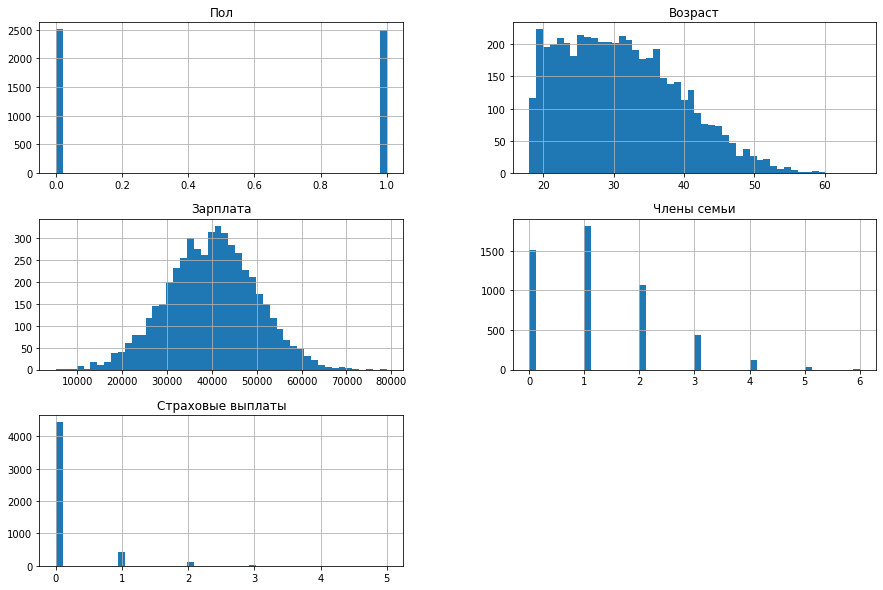

In [10]:
data.hist(figsize=(15,10), bins=48);

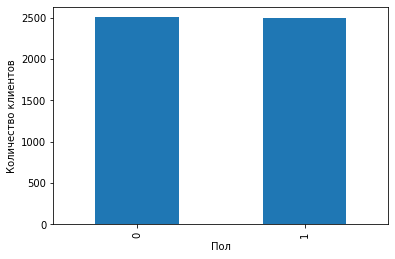

In [11]:
data['Пол'].value_counts().plot(kind='bar', xlabel='Пол', ylabel='Количество клиентов');

Распределение данных выглядит нормально. 
1) В столбце "Пол" два значения, распределены примерно в одинаковых долях.
2) По распределению в столбце возраст видно, что количество клиентов старше 35 лет постепенно уменьшается.
3) Распределение в столбце "Зарплата" почти соответствует нормальному. Средняя (и медианная) зарплата составляет около 40 тыс., непосредственно перед этим значением на гистограмме наблюдается сниженное по сравнению с ожидаемым значение, что может объясняться тем, 40 тыс. - психологический порог, ниже которого зарплата воспринимается как низкая, поэтому зарплату немного ниже 40 тыс. по возможности "дотягивают" до этого порогового значения.
4) Распределение значений в столбце "Члены семьи" выглядит правдоподобно. Чаще всего страховку оофрмляют клиенты, не имеющие семьи или имеющие 1-2 членов семьи. 
5) По распределению значений в столбце "Страховые выплаты" видно, что чаще всего выплат не требуется. Среди клиентов, получивших выплаты, больше всего страхователей, получивших выплату один раз. Максимальное число выплат одному клиенту - 5.


Проверим данные на наличие полных дубликатов. 

In [12]:
data.duplicated().sum()

153

Данные содержат дубликаты. Поскольку в данных нет идентифицирующей информации, мы не можем сказать вызвано ли это ошибками или случайным совпадением (разнообразие значений признаков не очень велико, поэтому такое в принципе возможно). Наличие дубликатов не влияет на цель - разработку алгоритма для защиты персональных данных – поэтому не будем их удалять.

**Выводы по шагу 1**

* Данные загружены и изучены.
* В столбцах `'Возраст'` и `'Зарплата'` тип данных изменен на целочисленный.
* Проведена предварительная оценка качества данных: отсутствуют существенные выбросы и неправдоподобные значения, есть дубликаты, наличие которых не влияет на конечную цель.

## Умножение матриц

Ответим на вопрос и обоснуем решение.

**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)**

*a. Изменится. Приведите примеры матриц.*

*b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.* 

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При умножении признаков на обратимую матрицу качество линейной регрессии не изменится. 

**Обоснование:** Обоснуем отвем методом преобразования формулы обучения.

Исходная матрица признаков - *X*, матрица, на которую умножаются признаки, – $P$, тогда преобразованная матрица – $XP$. Умножим матрицу признаков на обратимую матрицу: подставим в формулы $XP$ вместо $Х$ и определим значение предсказаний (*$a_{1}$* ) и вектор весов (*$w_{1}$*).

Предсказания:
$$
a_{1} = XPw_{1}
$$

Формула обучения:
$$
w_{1} = ((XP)^T (XP))^{-1} (XP)^T y
$$



Преобразуем формулу обучения.

Согласно свойству транспонированных матриц, $(AB)^T = B^T A^T$, тогда

$$
w_{1} = (P^T X^T (XP))^{-1} P^T X^T  y
$$

Согласно свойству ассоциативности $A(ВС) = (AВ)С$, тогда

$$
w_{1} = (P^T(X^TX) P)^{-1} P^T X^T  y
$$

Согласно свойству обратных матриц, $(AB)^{-1}=B^{-1}A^{-1}$, тогда

$$
w_{1} = P^{-1}(X^T X)^{-1}(P^T)^{-1} P^T X^T y
$$

При умножении матрицы на обратную получаем единичную матрицу *E*, тогда 

$$
P^T (P^T)^{-1} = (P^T)^{-1} P^T = E
$$

$$
w_{1} = P^{-1}(X^T X)^{-1} E X^T y
$$

При умножении любой матрицы на единичную матрицу получаем ту же самую матрицу, тогда

$$
w_{1} = P^{-1}(X^T X)^{-1} X^T y
$$


Поскольку $w = (X^T X)^{-1} X^T y$, можем подставить $w$ в формулу выше:

$$
w_{1} =  P^{-1}w
$$

Подставим правую часть полученной выше формулы $w_{1}$ в формулу предсказаний $a_{1}$

$$
a_{1} = XPw_{1}
$$

$$
a_{1} = XPP^{-1}w
$$

Согласно свойству обратных матриц, $PP^{-1} = E$, при умножении на $E$ получаем ту же матрицу:

$$
a_{1} = XEw = Xw
$$

Согласно условию, вектор предсказаний $a = Xw$, то есть

$$
a_{1} = a
$$ 

**Вывод по шагу 2**

При умножении признаков на обратимую матрицу предсказания модели не изменятся.

## Алгоритм преобразования

**Алгоритм**

Для защиты персональных данных клиентов умножим матрицу признаков на случайную обратимую матрицу. Для этого выполним следующие шаги:
1) Сгенерируем случайную обратимую матрицу необходимого размера. Обратимая матрица по определению квадратная, поэтому ее размер будет $n*n$, при этом умножение матриц возможно только в случае, если количество столбцов первой матрицы равно количеству строк второй, поэтому $n$ равно количеству признаков (столбцов).
2) Проверим матрицу на обратимость
3) Умножим матрицу признаков на полученную случайную матрицу.

**Обоснование**

На предыдущем шаге мы доказали, что при умножении модели на обратимую матрицу предсказания модели не изменятся. Это свойство можно использовать для создания алгоритма преобразования данных, который позволит защитить персональные данные клиентов.  

Проверим, что вектор предсказаний не меняется при умножении матрицы признаков на случайную обратимую матрицу. Будем использовать формулы из предыдущего шага:

$$
a = Xw
$$

$$
w = (X^T X)^{-1} X^T y
$$

Разделим данные на признаки и целевой признак

In [13]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

Напишем функцию для расчета вектора весов и предсказаний, которая выведет на экран первые значения предсказаний, описательную статистику и гистограмму частот.

In [14]:
def predictions_overview(features, target):
    w = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(target)
    a = features @ w
    display(a.head())
    display(a.describe())
    a.hist(bins=100)
    return a

0    0.282873
1    0.580514
2    0.429481
3   -0.091957
4    0.301713
dtype: float64

count    5000.000000
mean        0.175827
std         0.236730
min        -0.488522
25%        -0.002407
50%         0.160437
75%         0.336215
max         1.280797
dtype: float64

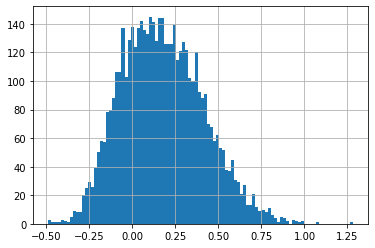

In [15]:
a = predictions_overview(features, target)

Сгенерируем случайную матрицу нужного размера (количество признаков - 4) и проверим ее на обратимость.

In [16]:
random_matrix = np.random.normal(size = (4, 4))
random_matrix

try:
    inverse_matrix = np.linalg.inv(random_matrix)
except:
    print('Матрица необратима')

Умножим признаки на обратимую матрицу

In [17]:
features_converted = features @ random_matrix

0    0.282872
1    0.580513
2    0.429481
3   -0.091958
4    0.301713
dtype: float64

count    5000.000000
mean        0.175827
std         0.236730
min        -0.488522
25%        -0.002407
50%         0.160436
75%         0.336215
max         1.280796
dtype: float64

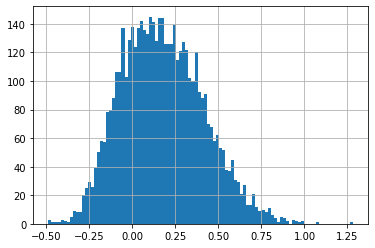

In [18]:
a1 = predictions_overview(features_converted, target)

Рассчитаем вектор разниц между предсказаниями до и после умножения признаков на обратимую матрицу, выведем наибольшее значение и суммируем элементы вектора.

In [19]:
difference = a - a1
print('Максимальная разница:', difference.min())
print('Сумма различий:', difference.sum())

Максимальная разница: -3.9180906297175966e-07
Сумма различий: 0.0006036088339026482


Проверим возможность восстановления зашифрованных данных. Для этого преобразованные признаки умножим на матрицу, обратную сгененированной случайной матрице (то есть полученную выше при проверке на обратимость `inverse_matrix`). Полученные результаты приведем к целым числам и найдем сумму различий между исходными и восстановленными признаками.

In [20]:
features_returned = features_converted @ inverse_matrix
features_returned = features_returned.round(0).astype('int')
features_returned.columns = ['Пол', 'Возраст', 'Зарплата', 'Члены семьи']
print(f"Cумма различий между исходными и восстановленными признаками \n {(features_returned - features).sum()}")

Cумма различий между исходными и восстановленными признаками 
 Пол            0
Возраст        0
Зарплата       0
Члены семьи    0
dtype: int64


Восстановленные признаки не отличаются от исходных.

**Вывод по шагу 3**

Для защиты персональных данных клиентов предложен алгоритм, предполагающий умножение матрицы признаков на случайную обратимую матрицу. Это возможно, поскольку при таком умножении предсказания модели не изменятся. Исходные данные можно восстановить путем умножения на обратную матрицу.

## Проверка алгоритма

**1. Проверим работу алгоритма, используя случайную матрицу (`random_matrix`), сгенерированную на предыдущем шаге и проверенную на обратимость, и преобразованные признаки (`features_converted`).**

Напишем функцию для обучения линейной регрессии и вычисления значения метрики R2.

In [21]:
def r2(features, target, for_data):
    model = LinearRegression()
    model.fit(features, target)
    predictions = model.predict(features)
    print(f"R2 {for_data}: {r2_score(target, predictions)}")

Обучим модель линейной регрессии на данных до преобразования и вычислим метрику R2.

In [22]:
r2(features, target, 'для исходных данных')

R2 для исходных данных: 0.42494550308169177


Обучим модель линейной регрессии на преобразованных данных и вычислим метрику R2.

In [23]:
r2(features_converted, target, 'для преобразованных данных')

R2 для преобразованных данных: 0.4249455030817081


Разница между значениями метрики R2 для модели, обученной на исходных признаках и признаках, умноженных на обратимую матрицу, ничтожно мала.

**2. Проверим работу алгоритма на тестовой выборке (с масштабированием и без).**

Напишем функцию для вычисления значения метрики R2 на тестовой выборке.

In [24]:
def r2_test(features_train, features_test, target_train, target_test, for_data):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    print(f"R2 {for_data}: {r2_score(target_test, predictions)}")

Напишем функцию для масштабирования признаков методом стандартизации данных.

In [25]:
def standard_scaler(features_train, features_test):
    numeric = features_train.columns
    scaler = StandardScaler()
    features_train[numeric] = scaler.fit_transform(features_train[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])
    return features_train, features_test

***Для исходных данных***

Разделим исходные данные на обучающую и тестовую выборки в соотношении 3:1.

In [26]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

*Обучим модель и определим значение метрики R2 на тестовой выборке (без масштабирования).*

In [27]:
r2_test(features_train, features_test, target_train, target_test, 
        'для исходных данных на тестовой выборке')

R2 для исходных данных на тестовой выборке: 0.4352275684083322


Масштабируем признаки до преобразования.

In [28]:
features_train_scaled, features_test_scaled = standard_scaler(features_train, features_test)

*Обучим модель и определим значение метрики R2 на тестовой выборке (с масштабированием).*

In [29]:
r2_test(features_train_scaled, features_test_scaled, target_train, target_test, 
        'для исходных данных на тестовой выборке (с масштабированием)')

R2 для исходных данных на тестовой выборке (с масштабированием): 0.43522756840833376


***Для преобразованных данных***

Разделим преобразованные данные на обучающую и тестовую выборки в соотношении 3:1

In [30]:
features_train_converted, features_test_converted = train_test_split(
    features_converted, test_size=0.25, random_state=12345)

*Обучим модель и определим значение метрики R2 на тестовой выборке.*

In [31]:
r2_test(features_train_converted, features_test_converted, target_train, target_test, 
        'для преобразованных данных на тестовой выборке')

R2 для преобразованных данных на тестовой выборке: 0.43522756840818244


Масштабируем преобразованные признаки.

In [32]:
features_train_converted_scaled, features_test_converted_scaled = standard_scaler(
    features_train_converted, features_test_converted)

*Обучим модель и определим значение метрики R2 на тестовой выборке (с масштабированием).*

In [33]:
r2_test(features_train_converted_scaled, features_test_converted_scaled, target_train, target_test, 
        'для преобразованных данных на тестовой выборке (с масштабированием)')

R2 для преобразованных данных на тестовой выборке (с масштабированием): 0.43522756840829213


Разница между всеми значениями метрики R2 на тестовой выборке (для исходных и преобразованных признаков с масштабированием и без) ничножно мала.

**Вывод по шагу 4**

Работа алгоритма проверена путем определения значения метрики R2 на исходных и преобразованных признаках. Было показано, что различие значений метрики R2 для модели обученной на данных до преобразования и данных, преобразованных путем умножения признаков на случайную обратимую матрицу, несущественно.

## Итоги

Был предложен метод преобразования данных, который позволит защитить данные клиентов страховой компании «Хоть потоп», при этом качество моделей машинного обучения не ухудшилось. 

В ходе работы были выполнены следующие действия:

* Данные загружены и изучены.
* Дан ответ на вопрос: "Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?" Путем преобразования формулы обучения было доказано, что качество линейной регрессии не поменяется.
* Предложен алгоритм преобразования данных, предполагающий умножение матрицы признаков на случайную обратимую матрицу, проверена возможность восстановления исходных значений признаков.
* Работа алгоритма проверена путем определения значения метрики R2 на исходных и преобразованных признаках.

**Общий вывод**: 
Алгоритм защиты  данных, предполагающий умножение матрицы признаков на случайную обратимую матрицу, позволяет преобразовать данные таким образом, что персональные данные клиентов оказываются зашифрованы, при этом качество линейной регрессии (как одной из моделей машинного обучения) не меняется.